# 🔎 Análisis Exploratorio de Datos (Google):

## Importación de librerias

In [2]:
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from data_utils import data_type_check

### Importación de los datasets

In [3]:
df_metadata = pd.read_parquet('../0_Dataset/Data_Limpia/Google/G_metadata_FL.parquet', engine='pyarrow')
df_review = pd.read_parquet('../0_Dataset/Data_Limpia/Google/G_review_FL_reducido.parquet', engine='pyarrow')

### Funciones importantes

In [4]:
# FUNCION PARA ENCONTRAR OUTLIERS CON EL RANGO INTERCUARTILICO
def encontrar_outliers_IQR(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

In [5]:
# FUNCION PARA ENCONTRAR OUTLIERS CON LA REGLA DE LAS 3 SIGMAS
def encontrar_outliers_3sigmas(data):
    mean = data.mean()
    std = data.std()
    lower_bound = mean - 3 * std
    upper_bound = mean + 3 * std
    return data[(data < lower_bound) | (data > upper_bound)]

In [6]:
# FUNCION PARA ENCONTRAR EL RANGO MINIMO Y MAXIMO DEL IQR
def calculate_iqr_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return float(lower_bound), float(upper_bound)

## EDA

Verificación de los datos

In [7]:
df_metadata.head(5)

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
1302883,Neurocare & Family Services,"Neurocare & Family Services, 1749 S Naperville...",0x880e55ddb0081907:0x1dc5f1650b07c388,None,41.839291,-88.100503,[Doctor],5.0,1,None,"[[Monday, Closed], [Tuesday, 8AM–10PM], [Wedne...",{'Accessibility': ['Wheelchair accessible entr...,Closed ⋅ Opens 8AM Tue,"[0x880e55ddba9f7635:0x862c597b017011c1, 0x880e...",https://www.google.com/maps/place//data=!4m2!3...
749243,Bayview Canvas,"Bayview Canvas, 22460 Glass Ln, Port Charlotte...",0x146c6dea0e8465f9:0xca5e7f14cefd4983,None,26.962494,-82.075552,[Upholstery shop],5.0,1,None,"[[Friday, 8AM–5PM], [Saturday, Closed], [Sunda...","{'Accessibility': None, 'Activities': None, 'A...",Open ⋅ Closes 5PM,"[0x88dca9b000000001:0xae92d5429c06878a, 0x88db...",https://www.google.com/maps/place//data=!4m2!3...
2190487,Peluquería Acapulco Barbershop,"Peluquería Acapulco Barbershop, 1014 Gault Ave...",0x8861d6398caaf079:0x7a735e53dfeac495,None,34.450636,-85.714130,[Barber shop],4.8,58,None,"[[Saturday, 10AM–5PM], [Sunday, Closed], [Mond...",{'Accessibility': ['Wheelchair accessible entr...,Closed ⋅ Opens 10AM,"[0x8861d640f8cf4415:0xc50ef1793d0439da, 0x8861...",https://www.google.com/maps/place//data=!4m2!3...
1932075,Mountain Travelers Hike and Ski Shop,"Mountain Travelers Hike and Ski Shop, 147 US-4...",0x89e024365cd93733:0x97f767d0409e00af,None,43.622089,-72.953674,"[Ski shop, Camping store, Car accessories store]",4.4,26,None,"[[Thursday, 10AM–5PM], [Friday, 10AM–5PM], [Sa...",None,Permanently closed,"[0x89e024ecbaaafc07:0xf913f5e468d2db08, 0x89e0...",https://www.google.com/maps/place//data=!4m2!3...
489691,Lovely Nails,"Lovely Nails, 636 Brandon Ave SW, Roanoke, VA ...",0x884d0da7e0e9de07:0xfaeb98dff1ad0e89,None,37.254535,-79.959470,[Nail salon],4.3,145,None,"[[Monday, 9:30AM–7:30PM], [Tuesday, 9:30AM–7:3...",{'Accessibility': ['Wheelchair accessible entr...,Closed ⋅ Opens 9:30AM Tue,"[0x884d0cff3546c2e1:0xf91b9ff679bd14aa, 0x884d...",https://www.google.com/maps/place//data=!4m2!3...


In [8]:
df_metadata.price.value_counts()

price
$       8785
$$      7503
$$$      558
$$$$      60
Name: count, dtype: int64

In [9]:
df_review.head()

,user_id,name,time,rating,text,pics,resp,gmap_id
762395,1.145803e+20,jose martinez,1525385005812,5,(Translated by Google) Excellent service ... a...,None,None,0x88d9b684949c6fa1:0x5da9b5c4bd240d6b
924820,1.077641e+20,Ian Horow,1619985567951,5,None,None,None,0x88d901c07a850b25:0x53258790576101e6
1765663,1.003756e+20,Lauren Palmer,1605046404419,5,I was really impressed with the service we rec...,None,None,0x8890c53f737b08dd:0x9b2fc3221b8c1fff
2393358,1.102839e+20,Merrilee Crank,1527010637476,5,Clean very nice people work here I've been to ...,None,None,0x88e7c6dcd2e0a14d:0xb3b8214e70fb8540
1683593,1.156291e+20,Sincere Dread,1564086971867,5,None,None,None,0x88c2e3863fb052d5:0xc7dd0c27ad588473


Eliminación de columnas innecesarias

In [10]:
df_metadata.drop(columns=['relative_results','url'],inplace=True)

### 1. Información y transformación de los datos

#### Análisis de nulos

In [11]:
print(data_type_check(df_metadata))
print(data_type_check(df_review))


 Resumen del dataframe:

Dimensiones:  (220001, 13)
           columna  %_no_nulos  %_nulos  total_nulos tipo_dato
0             name      100.00     0.00            5    object
1          address       97.15     2.85         6275    object
2          gmap_id      100.00     0.00            0    object
3      description        7.16    92.84       204255    object
4         latitude      100.00     0.00            0   float64
5        longitude      100.00     0.00            0   float64
6         category       99.35     0.65         1428    object
7       avg_rating      100.00     0.00            0   float64
8   num_of_reviews      100.00     0.00            0     int64
9            price        7.68    92.32       203095    object
10           hours       72.82    27.18        59802    object
11            MISC       75.58    24.42        53728    object
12           state       74.25    25.75        56652    object
None

 Resumen del dataframe:

Dimensiones:  (712500, 8)
   colum

📚 Conclusiones:
- En "df_metadata" las variables description, price, hours, MISC, state, tienen una cantidad considerablemente grande de nulos. Por lo que solo admitiendo para el objetivo de análisis del 18%, se procede a eliminarlas y aportar información relevante para el análisis de datos.
- En "df_rebiew" las variables text, pics, resp, no aportan información relevante para el análisis por lo que se eliminará.
- Se eliminarán los registros que tengan algun dato nulo que son menores al 3% de los datos.

In [12]:
# SE REALIZARÁ UN REINICIO DE INDICES
df_metadata.reset_index(drop=True,inplace=True)
df_review.reset_index(drop=True,inplace=True)

In [13]:
# OBTENEMOS SOLO LAS COLUMNAS QUE NOS VAN A AYUDAR A NUESTRO ANÁLISIS
df_metadata.drop(columns=['description','price', 'hours', 'MISC', 'state'],inplace=True)
df_review.drop(columns=['text','pics','resp'],inplace=True)

In [14]:
# ELIMINACIÓN DE REGISTRO QUE CONTINENEN REGISTRO NULOS
df_metadata.dropna(axis=0,inplace=True)

In [15]:
print(data_type_check(df_metadata))
print(data_type_check(df_review))


 Resumen del dataframe:

Dimensiones:  (212299, 8)
          columna  %_no_nulos  %_nulos  total_nulos tipo_dato
0            name       100.0      0.0            0    object
1         address       100.0      0.0            0    object
2         gmap_id       100.0      0.0            0    object
3        latitude       100.0      0.0            0   float64
4       longitude       100.0      0.0            0   float64
5        category       100.0      0.0            0    object
6      avg_rating       100.0      0.0            0   float64
7  num_of_reviews       100.0      0.0            0     int64
None

 Resumen del dataframe:

Dimensiones:  (712500, 5)
   columna  %_no_nulos  %_nulos  total_nulos tipo_dato
0  user_id       100.0      0.0            0   float64
1     name       100.0      0.0            0    object
2     time       100.0      0.0            0     int64
3   rating       100.0      0.0            0     int64
4  gmap_id       100.0      0.0            0    object
Non

#### Transformaciones de datos

In [16]:
# TRANSFORMACIÓN DE LA VARIABLE 'time'
df_review['dates'] = pd.to_datetime(df_review['time'], unit='ms')
df_review['year'] = df_review['dates'].dt.year
df_review['month'] = df_review['dates'].dt.strftime('%B')
df_review['day'] = df_review['dates'].dt.day

In [17]:
# ELIMINAMOS LA VARIABLE 'time'
df_review.drop(columns=['time'],inplace=True)

In [53]:
df_review.head(5)

,user_id,name,rating,gmap_id,dates,year,month,day
0,1.145803e+20,jose martinez,5,0x88d9b684949c6fa1:0x5da9b5c4bd240d6b,2018-05-03 22:03:25.812,2018,May,3
1,1.077641e+20,Ian Horow,5,0x88d901c07a850b25:0x53258790576101e6,2021-05-02 19:59:27.951,2021,May,2
2,1.003756e+20,Lauren Palmer,5,0x8890c53f737b08dd:0x9b2fc3221b8c1fff,2020-11-10 22:13:24.419,2020,November,10
3,1.102839e+20,Merrilee Crank,5,0x88e7c6dcd2e0a14d:0xb3b8214e70fb8540,2018-05-22 17:37:17.476,2018,May,22
4,1.156291e+20,Sincere Dread,5,0x88c2e3863fb052d5:0xc7dd0c27ad588473,2019-07-25 20:36:11.867,2019,July,25


### 2. Variables cuantitativas y categóricas

In [18]:
#CLASIFICAMOS POR TIPO DE VARIABLES
df_metadata_num = df_metadata.select_dtypes('number')
df_metadata_cat = df_metadata.select_dtypes('O')

df_review_num = df_review.select_dtypes('number')
df_review_cat = df_review.select_dtypes('O')

In [19]:
print(df_metadata_num.head())
print(df_metadata_cat.head())
print(df_review_num.head())
print(df_review_cat.head())

    latitude  longitude  avg_rating  num_of_reviews
0  41.839291 -88.100503         5.0               1
1  26.962494 -82.075552         5.0               1
2  34.450636 -85.714130         4.8              58
3  43.622089 -72.953674         4.4              26
4  37.254535 -79.959470         4.3             145
                                   name  \
0           Neurocare & Family Services   
1                        Bayview Canvas   
2        Peluquería Acapulco Barbershop   
3  Mountain Travelers Hike and Ski Shop   
4                          Lovely Nails   

                                             address  \
0  Neurocare & Family Services, 1749 S Naperville...   
1  Bayview Canvas, 22460 Glass Ln, Port Charlotte...   
2  Peluquería Acapulco Barbershop, 1014 Gault Ave...   
3  Mountain Travelers Hike and Ski Shop, 147 US-4...   
4  Lovely Nails, 636 Brandon Ave SW, Roanoke, VA ...   

                                 gmap_id  \
0  0x880e55ddb0081907:0x1dc5f1650b07c388   
1  0

#### Análisis de las Variables Cuantitativas

In [20]:
# MUESTRA DEL DATASET
print(df_metadata_num.head(5))
print(df_review_num.head(5))

    latitude  longitude  avg_rating  num_of_reviews
0  41.839291 -88.100503         5.0               1
1  26.962494 -82.075552         5.0               1
2  34.450636 -85.714130         4.8              58
3  43.622089 -72.953674         4.4              26
4  37.254535 -79.959470         4.3             145
        user_id  rating  year  day
0  1.145803e+20       5  2018    3
1  1.077641e+20       5  2021    2
2  1.003756e+20       5  2020   10
3  1.102839e+20       5  2018   22
4  1.156291e+20       5  2019   25


Descripción estadístico

In [21]:
# DESCRIPCIÓN ESTADISTICO DE LOS DATOS NUMÉRICOS
df_metadata_num.loc[:,['avg_rating','num_of_reviews']].describe().T

,count,mean,std,min,25%,50%,75%,max
avg_rating,212299.0,4.298270,0.729039,1.0,4.0,4.5,4.8,5.0
num_of_reviews,212299.0,33.826127,72.807075,1.0,6.0,15.0,37.0,6960.0


In [22]:
df_review_num.loc[:,['rating','year']].describe().T

,count,mean,std,min,25%,50%,75%,max
rating,712500.0,4.313642,1.169507,1.0,4.0,5.0,5.0,5.0
year,712500.0,2018.798132,1.424792,2003.0,2018.0,2019.0,2020.0,2021.0


##### Gráficos

Text(0, 0.5, 'Frecuencia')

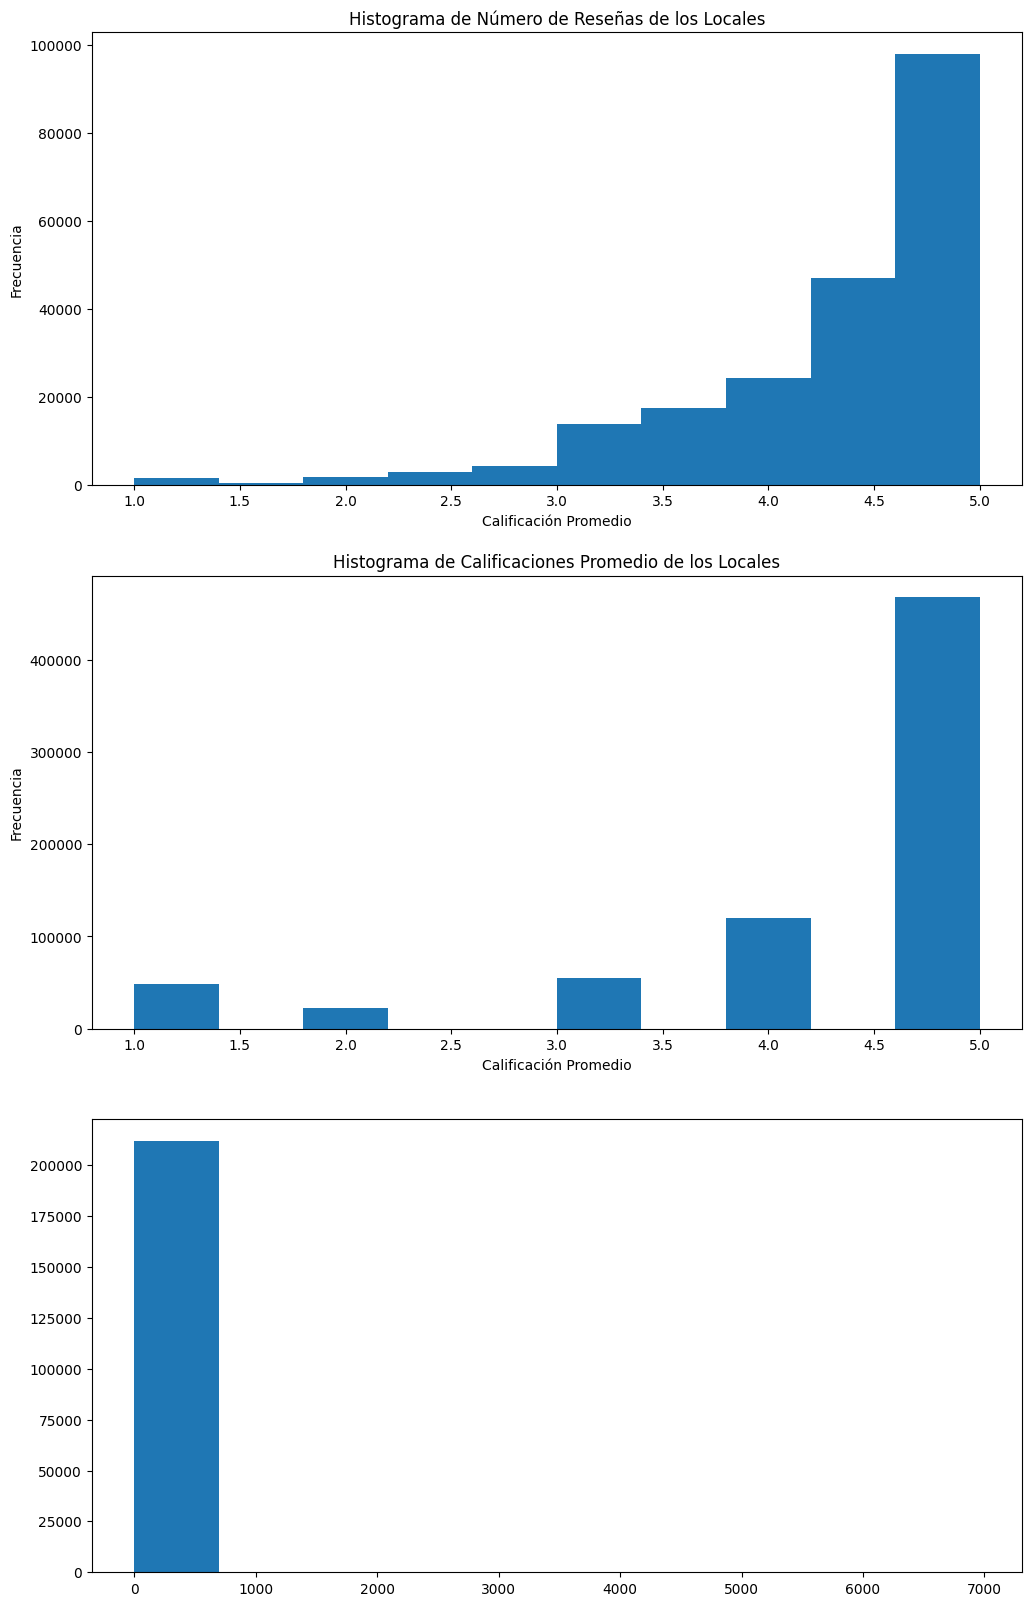

In [23]:
# HISTOGRAMA DE LA CANTIDAD DE CALIFICACIÓN QUE SE DA LOS RESTAURANTES
fig, axes = plt.subplots(3,1,figsize=(12,20))
axes[0].hist(df_metadata_num.avg_rating)
axes[0].set_title('Histograma de Calificaciones Promedio de los Locales')
axes[0].set_xlabel('Calificación Promedio')
axes[0].set_ylabel('Frecuencia')

axes[1].hist(df_review_num.rating)
axes[1].set_title('Histograma de Calificaciones Promedio de los Locales')
axes[1].set_xlabel('Calificación Promedio')
axes[1].set_ylabel('Frecuencia')

axes[2].hist(df_metadata_num.num_of_reviews)
axes[0].set_title('Histograma de Número de Reseñas de los Locales')
axes[0].set_xlabel('Calificación Promedio')
axes[0].set_ylabel('Frecuencia')

📚 Conclusiones:
- Se ve que hay una cantidad considerable de outliers estos se ven reflejados en las colas izquierdas de los histogramas de ratings de ambos dataset.

#### Análisis de variables categóricas

In [24]:
print(data_type_check(df_metadata_cat))
print(data_type_check(df_review_cat))


 Resumen del dataframe:

Dimensiones:  (212299, 4)
    columna  %_no_nulos  %_nulos  total_nulos tipo_dato
0      name       100.0      0.0            0    object
1   address       100.0      0.0            0    object
2   gmap_id       100.0      0.0            0    object
3  category       100.0      0.0            0    object
None

 Resumen del dataframe:

Dimensiones:  (712500, 3)
   columna  %_no_nulos  %_nulos  total_nulos tipo_dato
0     name       100.0      0.0            0    object
1  gmap_id       100.0      0.0            0    object
2    month       100.0      0.0            0    object
None


#### Outliers

In [25]:
# SE ENCUENTRA LOS OUTLIERS POR MEDIO DEL RANGO INTERCUARTILICO
print(calculate_iqr_outliers(df_metadata_num.avg_rating))
print(calculate_iqr_outliers(df_metadata_num.num_of_reviews))
print(calculate_iqr_outliers(df_review_num.rating))

(2.8000000000000003, 6.0)
(-40.5, 83.5)
(2.5, 6.5)


In [26]:
# GUARDAMOS EN LOS MINIMOS Y MAXIMOS OUTLIERS
min_meta_rating,max_meta_rating = calculate_iqr_outliers(df_metadata_num.avg_rating)
min_meta_review,max_meta_review = calculate_iqr_outliers(df_metadata_num.num_of_reviews)
min_review_rating,max_review_rating = calculate_iqr_outliers(df_review_num.rating)

In [27]:
# FILTRADO 1
filtro_1 = (df_metadata_num.avg_rating >= min_meta_rating)&(df_metadata_num.avg_rating <= max_meta_rating)
df_metadata_num_fil = df_metadata_num[filtro_1]

# FILTRADO 2
filtro_2 = (df_metadata_num_fil.num_of_reviews >= min_meta_review)&(df_metadata_num_fil.num_of_reviews <= max_meta_review)
df_metadata_num_fil = df_metadata_num_fil[filtro_2]

# FILTRADO 3
filtro_3 = (df_review_num.rating >= min_review_rating)&(df_review_num.rating <= max_review_rating)
df_review_num_fil = df_review_num[filtro_3]

In [28]:
df_review_num_fil

,user_id,rating,year,day
0,1.145803e+20,5,2018,3
1,1.077641e+20,5,2021,2
2,1.003756e+20,5,2020,10
3,1.102839e+20,5,2018,22
4,1.156291e+20,5,2019,25
...,...,...,...,...
712495,1.079692e+20,4,2019,30
712496,1.022552e+20,5,2019,4
712497,1.062630e+20,4,2019,24
712498,1.112502e+20,5,2020,8


In [29]:
df_metadata_num_fil

,latitude,longitude,avg_rating,num_of_reviews
0,41.839291,-88.100503,5.0,1
1,26.962494,-82.075552,5.0,1
2,34.450636,-85.714130,4.8,58
3,43.622089,-72.953674,4.4,26
5,42.205127,-74.212669,5.0,2
...,...,...,...,...
219996,38.408448,-121.447597,4.3,13
219997,32.462258,-92.160431,4.0,3
219998,35.557125,-82.535757,4.6,14
219999,42.229032,-87.940695,5.0,8


📚 Conclusiones:
- Hay outliers, de lugares donde tuvieron mucha acogida ya sea por promociones, precios bajos, etc. Lo que normalmente no sería de esa manera.
- En cuanto al tipo de calificaciones, existen calificaciones que no aportan calidad al análisis como los menores a 2.8. Estos son los que no serán necesarios para nuestro análisis.
- Se procedera a realizar el filtrado en los datasets originales para obtener insights significativos.

In [30]:
# FILTRADO 1
filtro_1 = (df_metadata.avg_rating >= min_meta_rating)&(df_metadata.avg_rating <= max_meta_rating)
df_metadata_fil = df_metadata[filtro_1]

# FILTRADO 2
filtro_2 = (df_metadata_fil.num_of_reviews >= min_meta_review)&(df_metadata_fil.num_of_reviews <= max_meta_review)
df_metadata_fil = df_metadata_fil[filtro_2]

# FILTRADO 3
filtro_3 = (df_review.rating >= min_review_rating)&(df_review.rating <= max_review_rating)
df_review_fil = df_review[filtro_3]

In [49]:
df_metadata_fil.head(3)

,name,address,gmap_id,latitude,longitude,category,avg_rating,num_of_reviews
0,Neurocare & Family Services,"Neurocare & Family Services, 1749 S Naperville...",0x880e55ddb0081907:0x1dc5f1650b07c388,41.839291,-88.100503,[Doctor],5.0,1
1,Bayview Canvas,"Bayview Canvas, 22460 Glass Ln, Port Charlotte...",0x146c6dea0e8465f9:0xca5e7f14cefd4983,26.962494,-82.075552,[Upholstery shop],5.0,1
2,Peluquería Acapulco Barbershop,"Peluquería Acapulco Barbershop, 1014 Gault Ave...",0x8861d6398caaf079:0x7a735e53dfeac495,34.450636,-85.714130,[Barber shop],4.8,58


In [32]:
df_review_fil.head(3)

,user_id,name,rating,gmap_id,dates,year,month,day
0,1.145803e+20,jose martinez,5,0x88d9b684949c6fa1:0x5da9b5c4bd240d6b,2018-05-03 22:03:25.812,2018,May,3
1,1.077641e+20,Ian Horow,5,0x88d901c07a850b25:0x53258790576101e6,2021-05-02 19:59:27.951,2021,May,2
2,1.003756e+20,Lauren Palmer,5,0x8890c53f737b08dd:0x9b2fc3221b8c1fff,2020-11-10 22:13:24.419,2020,November,10


### INSIGHTS

- Años donde más hubieron reseñas

<Axes: ylabel='year'>

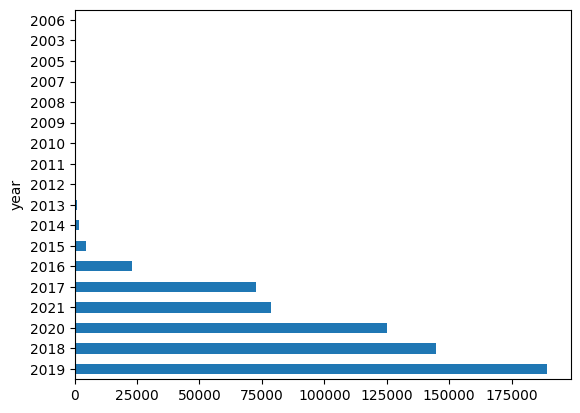

In [33]:
df_review_fil.year.value_counts().plot.barh()

- Los 3 Meses del año donde se concentran la mayor cantidad de reseñas

month
January     60627
March       59378
February    58635
Name: count, dtype: int64


<Axes: ylabel='month'>

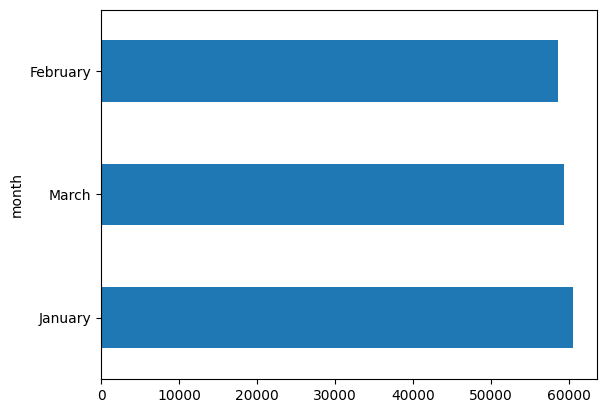

In [34]:
print(df_review_fil.month.value_counts().head(3))
df_review_fil.month.value_counts().head(3).plot.barh()

- Entre que días del mes son donde tienen más reseñas

In [35]:
# Definir una función para asignar jerarquías
def asignar_jerarquia(dia):
    if 1 <= dia <= 10:
        return 'Del 1 al 10 dias del mes'
    elif 11 <= dia <= 20:
        return 'Del 11 al 20 dias del mes'
    elif 21 <= dia <= 31:
        return 'Del 21 al 31 dias del mes'
    else:
        return 'No hay jerarquía'
    
df_review_fil['days_range'] = df_review_fil['day'].apply(asignar_jerarquia)

C:\Users\JAY\AppData\Local\Temp\ipykernel_4552\485910752.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_review_fil['days_range'] = df_review_fil['day'].apply(asignar_jerarquia)


days_range
Del 21 al 31 dias del mes    33.828099
Del 1 al 10 dias del mes     33.242725
Del 11 al 20 dias del mes    32.929176
Name: proportion, dtype: float64


<Axes: ylabel='count'>

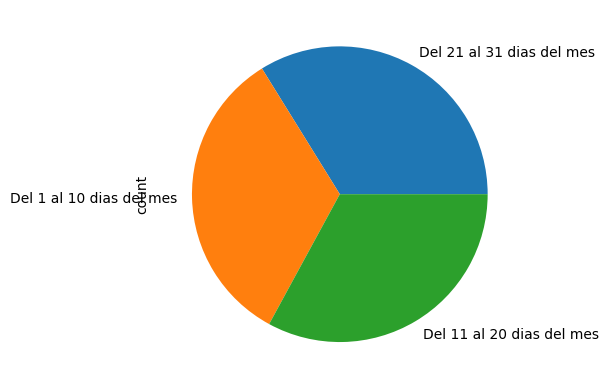

In [36]:
print(df_review_fil['days_range'].value_counts(normalize=True)*100)
df_review_fil['days_range'].value_counts().plot.pie()

- Frecuencia de calificaciones por rating

In [37]:
# SE ENCUENTRA LA FRECUENCIA DE LAS CALIFICACIONES
freq_rates = df_metadata_fil.avg_rating.value_counts().reset_index()
freq_rates.columns = ['Ratings', 'Frequency']

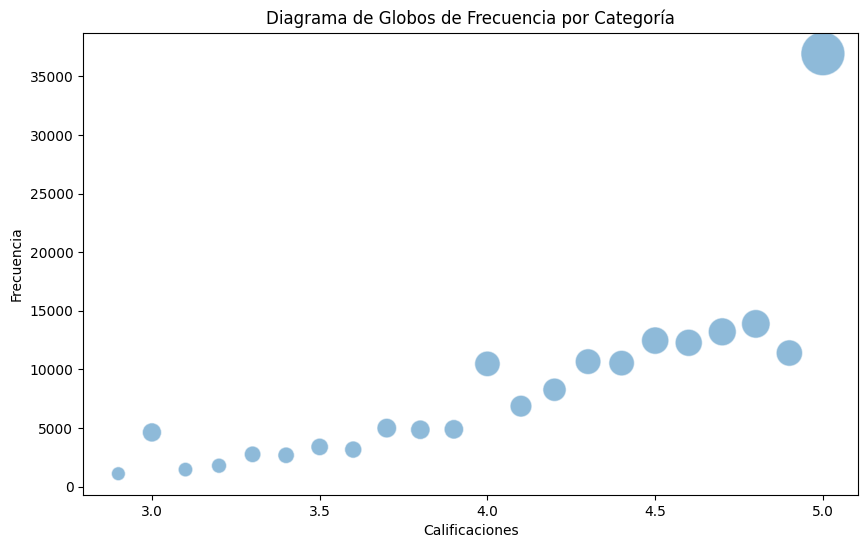

In [38]:
# GRAFICO DE BURBUJAS DE LAS CALIFICACIONES
plt.figure(figsize=(10, 6))
sns.scatterplot(data=freq_rates, x='Ratings', y='Frequency', size='Frequency', sizes=(100, 1000), alpha=0.5, legend=False)
plt.xlabel('Calificaciones')
plt.ylabel('Frecuencia')
plt.title('Diagrama de Globos de Frecuencia por Categoría')
plt.show()

- Frecuencia de calificaciones por número de reviews

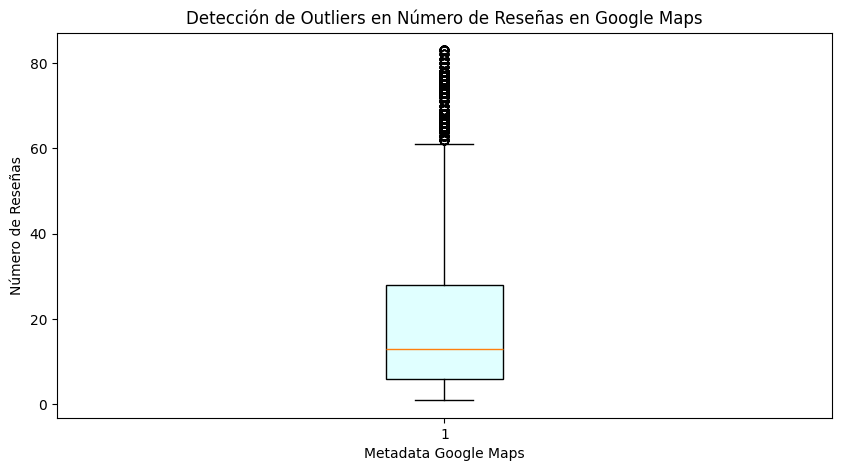

In [39]:
# GRAFICO DE CAJA Y BIGOTES PARA EL NUMERO DE REVIEWS
plt.figure(figsize=(10, 5))
plt.boxplot(df_metadata_fil['num_of_reviews'], patch_artist=True, boxprops=dict(facecolor='lightcyan'))
plt.xlabel('Metadata Google Maps')
plt.ylabel('Número de Reseñas')
plt.title('Detección de Outliers en Número de Reseñas en Google Maps')
plt.show()

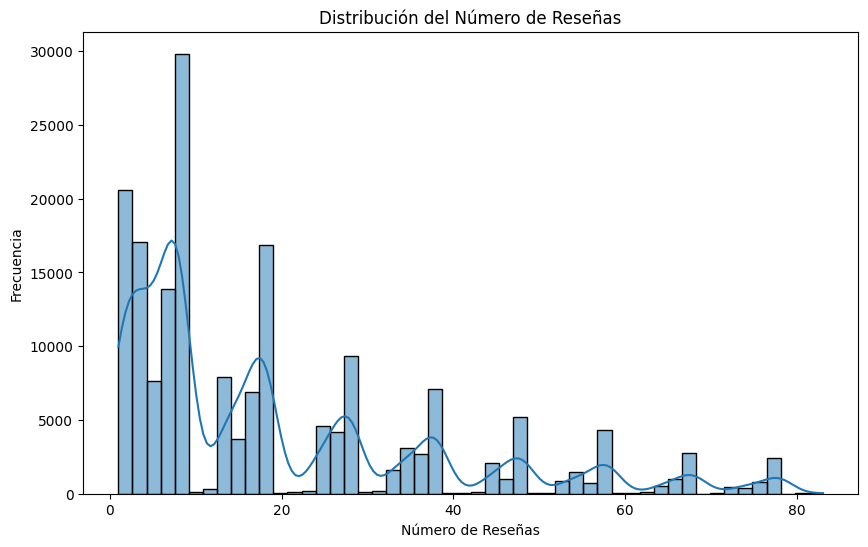

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(df_metadata_fil['num_of_reviews'], bins=50, kde=True)
plt.xlabel('Número de Reseñas')
plt.ylabel('Frecuencia')
plt.title('Distribución del Número de Reseñas')
plt.show()

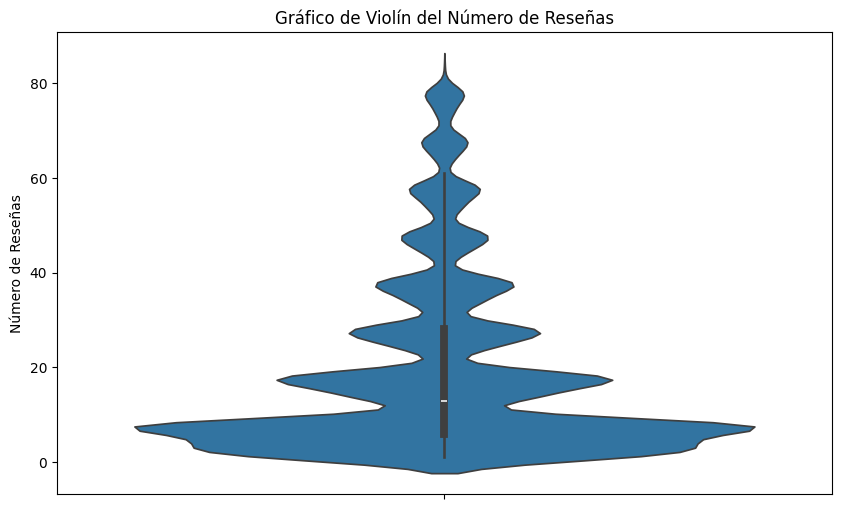

In [41]:
plt.figure(figsize=(10, 6))
sns.violinplot(y=df_metadata_fil['num_of_reviews'])
plt.title('Gráfico de Violín del Número de Reseñas')
plt.ylabel('Número de Reseñas')
plt.show()

- Numero promedio de calificaciones a los locales por categorías

In [42]:
df_metadata_exp = df_metadata_fil.explode('category')
df_metadata_exp.reset_index(drop=True,inplace=True)

In [43]:
df_category= df_metadata_exp.groupby('category')['avg_rating'].mean()
df_category.reset_index()
df_category.sort_values(ascending=False)

category
Oxygen cocktail spot               5.0
Orthoptist                         5.0
Judo club                          5.0
Jewelry exporter                   5.0
Beach volleyball club              5.0
                                  ... 
Municipal Department of Tourism    3.0
Tax                                3.0
Superfund site                     3.0
Public utility                     2.9
Canopy                             2.9
Name: avg_rating, Length: 3647, dtype: float64

- Las 5 categorias con mayor numero de reviews

category
Restaurant          126626
Auto repair shop    122355
Beauty salon        113262
Hair salon           93628
Nail salon           89298
Name: num_of_reviews, dtype: int64


<Axes: ylabel='category'>

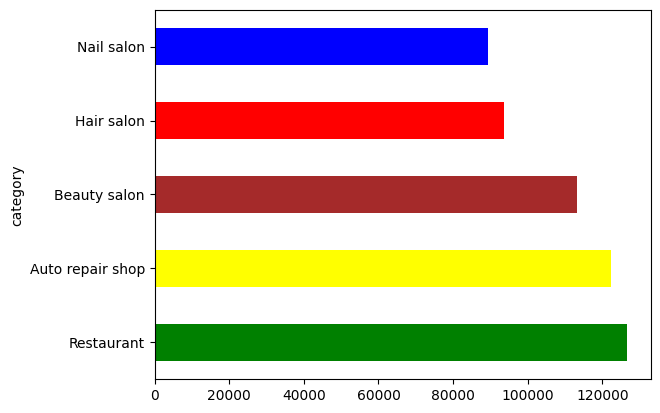

In [44]:
df_category_re = df_metadata_exp.groupby('category')['num_of_reviews'].sum().sort_values(ascending=False).head(5)
print(df_category_re)
df_category_re.plot.barh(color=['green','yellow','brown','red','blue'])

In [48]:
df_category_new = df_category.reset_index()
filtro = (df_category_new['category'] == 'Restaurant') | (df_category_new['category'] == 'Auto repair shop')
df_category_new[filtro]

,category,avg_rating
230,Auto repair shop,4.484960
2800,Restaurant,4.211682


📚 Conclusiones:
1. La categoría con mayor cantidad de reviews son los restaurantes con calificaciones promedio total de 4.2. Seguido por la categoría de tienda de reparaciones de auto con calificaciones promedio total de 4.48.
2. La cantidad de calificaciones más frecuente en los negocios rondan desde 0 a 20 reseñas.
3. Hay una cantidad mayor de reseñas y calificaciones dadas por los usuarios en el primer trimestre del año.

### Exportación de datos

In [52]:
# EXPORTACIÓN DEL DATASET SIN LOS DATOS NULOS
df_metadata.to_parquet('../0_Dataset/Data_Limpia/Google/google_metadata.parquet', engine='pyarrow')
df_review.to_parquet('../0_Dataset/Data_Limpia/Google/google_review.parquet', engine='pyarrow')